<a href="https://colab.research.google.com/github/ArunK-ML/ML-DL-Classification-Model---Enron-Fraud-Email---DataSet/blob/main/Fraud_Email_DL_ML_try2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Enron Fraud Email Dataset**

https://www.kaggle.com/datasets/advaithsrao/enron-fraud-email-dataset

# **Data Collection**

In [1]:
import pandas as pd
df = pd.read_csv("/content/Enron Fraud Email Dataset.csv", na_values=["", " ", "NA", "N/A", "NULL", "None"])
df.head()

,Folder-User,Folder-Name,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,...,Re,Source,Mail-ID,POI-Present,Suspicious-Folders,Sender-Type,Unique-Mails-From-Sender,Low-Comm,Contains-Reply-Forwards,Label
0,maildir,farmer-d,<14765870.1075854059714.JavaMail.evans@thyme>,"Tue, 7 Mar 2000 11:52:00 -0800 (PST)",lyris@listserv.augusthome.com,daren.farmer@enron.com,Welcome to WoodworkingTips.com!,1,text/plain; charset=us-ascii,7bit,...,NaN,Enron Data,15a4738ea7e2f12d79fcaf292122c61efc964d393ebaae...,FALSE,FALSE,External,2,TRUE,FALSE,0
1,maildir,weldon-c,<27248880.1075851688709.JavaMail.evans@thyme>,"Tue, 6 Feb 2001 07:29:00 -0800 (PST)",scott.joyce@bankofamerica.com,v.charles.weldon@enron.com,RE: Friday,1,text/plain; charset=us-ascii,7bit,...,NaN,Enron Data,c982b85fc76f105449624867c4838b9fab93de8d8930fe...,FALSE,FALSE,External,2,TRUE,TRUE,0
2,maildir,farmer-d,<30121413.1075860776823.JavaMail.evans@thyme>,"Wed, 18 Jul 2001 08:34:29 -0700 (PDT)",customer_service@footlocker.com,dfarmer@enron.com,Order Confirmation from Footlocker.com,1,text/plain; charset=ANSI_X3.4-1968,7bit,...,NaN,Enron Data,8651650eaff548c8eb7aabbabd08a1c4af5a4445909640...,FALSE,FALSE,External,3,TRUE,FALSE,1
3,maildir,shackleton-s,<11638341.1075844504953.JavaMail.evans@thyme>,"Mon, 10 Jul 2000 06:38:00 -0700 (PDT)",joel.ephross@enron.com,"jason.peters@enron.com, sarah.wesner@enron.com...",Re: Revised Guaranty,1,text/plain; charset=us-ascii,7bit,...,NaN,Enron Data,3aa9e2aea2a139e36c02fa05de6b2a36eb51c9f1915445...,FALSE,FALSE,Internal,36,FALSE,FALSE,0
4,maildir,cuilla-m,<2346151.1075858078353.JavaMail.evans@thyme>,"Wed, 15 Nov 2000 03:19:00 -0800 (PST)",support@imagestation.com,martin.cuilla@enron.com,Welcome to Sony's ImageStation!,1,text/plain; charset=us-ascii,7bit,...,NaN,Enron Data,25c0088a13689196d433e2f7e3b1524c18102e6c2555c0...,FALSE,FALSE,External,1,TRUE,FALSE,1


# **Problem Definition**

In [2]:
# Show all columns in output
pd.set_option('display.max_columns', None)

# Show first 5 rows
df.head()

,Folder-User,Folder-Name,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,Body,Cc,Bcc,Time,Attendees,Re,Source,Mail-ID,POI-Present,Suspicious-Folders,Sender-Type,Unique-Mails-From-Sender,Low-Comm,Contains-Reply-Forwards,Label
0,maildir,farmer-d,<14765870.1075854059714.JavaMail.evans@thyme>,"Tue, 7 Mar 2000 11:52:00 -0800 (PST)",lyris@listserv.augusthome.com,daren.farmer@enron.com,Welcome to WoodworkingTips.com!,1,text/plain; charset=us-ascii,7bit,Lyris <lyris@listserv.augusthome.com>,Daren J Farmer,NaN,NaN,\Darren_Farmer_Dec2000\Notes Folders\Discussio...,Farmer-D,dfarmer.nsf,**********************************************...,NaN,NaN,NaN,NaN,NaN,Enron Data,15a4738ea7e2f12d79fcaf292122c61efc964d393ebaae...,FALSE,FALSE,External,2,TRUE,FALSE,0
1,maildir,weldon-c,<27248880.1075851688709.JavaMail.evans@thyme>,"Tue, 6 Feb 2001 07:29:00 -0800 (PST)",scott.joyce@bankofamerica.com,v.charles.weldon@enron.com,RE: Friday,1,text/plain; charset=us-ascii,7bit,"""Joyce, Scott"" <scott.joyce@bankofamerica.com>",V.Charles.Weldon@enron.com,NaN,NaN,\Charles_Wheldon_Nov2001\Notes Folders\Discuss...,WHELDON-C,vweldon.nsf,RE: Friday Sure. I thought you said Friday. Th...,NaN,NaN,NaN,NaN,NaN,Enron Data,c982b85fc76f105449624867c4838b9fab93de8d8930fe...,FALSE,FALSE,External,2,TRUE,TRUE,0
2,maildir,farmer-d,<30121413.1075860776823.JavaMail.evans@thyme>,"Wed, 18 Jul 2001 08:34:29 -0700 (PDT)",customer_service@footlocker.com,dfarmer@enron.com,Order Confirmation from Footlocker.com,1,text/plain; charset=ANSI_X3.4-1968,7bit,customer_service@footlocker.com@ENRON <IMCEANO...,dfarmer@enron.com,NaN,NaN,"\Darren_Farmer_Mar2002\Farmer, Daren J.\Delete...",Farmer-D,dfarmer (Non-Privileged).pst,Order Confirmation from Footlocker.com Dear Da...,NaN,NaN,NaN,NaN,NaN,Enron Data,8651650eaff548c8eb7aabbabd08a1c4af5a4445909640...,FALSE,FALSE,External,3,TRUE,FALSE,1
3,maildir,shackleton-s,<11638341.1075844504953.JavaMail.evans@thyme>,"Mon, 10 Jul 2000 06:38:00 -0700 (PDT)",joel.ephross@enron.com,"jason.peters@enron.com, sarah.wesner@enron.com...",Re: Revised Guaranty,1,text/plain; charset=us-ascii,7bit,Joel Ephross,"cc: Jason.Peters@enron.com, Sarah.Wesner@enron...",NaN,NaN,\Sara_Shackleton_Dec2000_June2001_1\Notes Fold...,SHACKLETON-S,sshackle.nsf,The vast majority of this language is already ...,NaN,NaN,NaN,NaN,NaN,Enron Data,3aa9e2aea2a139e36c02fa05de6b2a36eb51c9f1915445...,FALSE,FALSE,Internal,36,FALSE,FALSE,0
4,maildir,cuilla-m,<2346151.1075858078353.JavaMail.evans@thyme>,"Wed, 15 Nov 2000 03:19:00 -0800 (PST)",support@imagestation.com,martin.cuilla@enron.com,Welcome to Sony's ImageStation!,1,text/plain; charset=us-ascii,7bit,ImageStation Customer Support <support@imagest...,mcuilla <martin.cuilla@enron.com>,NaN,NaN,\Martin_Cuilla_Dec2000\Notes Folders\Notes inbox,Cuilla-M,mcuilla.nsf,"Welcome to Sony's ImageStation! Hi mcuilla, We...",NaN,NaN,NaN,NaN,NaN,Enron Data,25c0088a13689196d433e2f7e3b1524c18102e6c2555c0...,FALSE,FALSE,External,1,TRUE,FALSE,1


In [3]:
df.shape

(8369, 32)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Folder-User                8348 non-null   object
 1   Folder-Name                8348 non-null   object
 2   Message-ID                 8348 non-null   object
 3   Date                       8348 non-null   object
 4   From                       8348 non-null   object
 5   To                         8064 non-null   object
 6   Subject                    8057 non-null   object
 7   Mime-Version               8346 non-null   object
 8   Content-Type               8346 non-null   object
 9   Content-Transfer-Encoding  8346 non-null   object
 10  X-From                     8346 non-null   object
 11  X-To                       8218 non-null   object
 12  X-cc                       1590 non-null   object
 13  X-bcc                      23 non-null     object
 14  X-Folder

In [5]:
df.isna().sum()

,0
Folder-User,21
Folder-Name,21
Message-ID,21
Date,21
From,21
To,305
Subject,312
Mime-Version,23
Content-Type,23
Content-Transfer-Encoding,23


In [6]:
df.duplicated().sum()

np.int64(67)

# **Data Cleaning & Preprocessing**

**Drop Null Values**

In [7]:
# --------------------------
# Fill Nulls by Column Type
# --------------------------

# 1. Critical IDs: drop rows if missing
# These fields are mandatory identifiers for each email.
# Without them, the row is incomplete and not useful → so we drop.
df = df.dropna(subset=["Message-ID", "Mail-ID", "From","To","Date", "Label","X-From","X-To"])

# 2. Text fields: replace missing values with "Unknown"
# Subject & Body are important for analysis, but missing values
# shouldn’t cause row loss. We replace with "Unknown" placeholder
# so model/EDA still works.
df["Subject"] = df["Subject"].fillna("Unknown")
df["Body"] = df["Body"].fillna("Unknown")

# 3. Metadata fields: replace missing with "Unknown"
# These are supporting fields (not critical for email identity).
# Filling with "Unknown" ensures consistency while keeping rows.
df["X-FileName"] = df["X-FileName"].fillna("Unknown")
df["X-Folder"] = df["X-Folder"].fillna("Unknown")
df["X-Origin"] = df["X-Origin"].fillna("Unknown")

# 4. Technical header fields: fill with mode (most common value)
# These fields are categorical protocol details. Missing values
# are best replaced with the mode since that represents the
# most frequent setting in the dataset.
df["Mime-Version"] = df["Mime-Version"].fillna(df["Mime-Version"].mode()[0])
df["Content-Type"] = df["Content-Type"].fillna(df["Content-Type"].mode()[0])
df["Content-Transfer-Encoding"] = df["Content-Transfer-Encoding"].fillna(df["Content-Transfer-Encoding"].mode()[0])


In [8]:
df.isna().sum()

,0
Folder-User,0
Folder-Name,0
Message-ID,0
Date,0
From,0
To,0
Subject,0
Mime-Version,0
Content-Type,0
Content-Transfer-Encoding,0


In [9]:
df.shape

(8044, 32)

In [10]:
df.duplicated().sum()

np.int64(46)

# **Feature Engineering & Selection**

In [11]:
import pandas as pd

# helper function
def extract_name_from_email(email):
    if pd.isna(email) or email == "Unknown":
        return "Unknown"
    email = str(email).split(",")[0].strip()
    if "@" in email:
        # domain part
        domain = email.split("@")[1]
        return domain.split(".")[0]
    return email

# main function to fix X-To_Name
def fix_x_to_name(df):
    # Create the column if it doesn't exist
    if "X-To_Name" not in df.columns:
        df["X-To_Name"] = None

    df["X-To_Name"] = df.apply(
        lambda row: extract_name_from_email(row["To"])
        if pd.isna(row["X-To_Name"]) or row["X-To_Name"] == "Unknown"
        else row["X-To_Name"],
        axis=1
    )
    return df

# ---------- Function Call ----------
df = fix_x_to_name(df)

In [12]:
df.head()

,Folder-User,Folder-Name,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,Body,Cc,Bcc,Time,Attendees,Re,Source,Mail-ID,POI-Present,Suspicious-Folders,Sender-Type,Unique-Mails-From-Sender,Low-Comm,Contains-Reply-Forwards,Label,X-To_Name
0,maildir,farmer-d,<14765870.1075854059714.JavaMail.evans@thyme>,"Tue, 7 Mar 2000 11:52:00 -0800 (PST)",lyris@listserv.augusthome.com,daren.farmer@enron.com,Welcome to WoodworkingTips.com!,1,text/plain; charset=us-ascii,7bit,Lyris <lyris@listserv.augusthome.com>,Daren J Farmer,NaN,NaN,\Darren_Farmer_Dec2000\Notes Folders\Discussio...,Farmer-D,dfarmer.nsf,**********************************************...,NaN,NaN,NaN,NaN,NaN,Enron Data,15a4738ea7e2f12d79fcaf292122c61efc964d393ebaae...,FALSE,FALSE,External,2,TRUE,FALSE,0,enron
1,maildir,weldon-c,<27248880.1075851688709.JavaMail.evans@thyme>,"Tue, 6 Feb 2001 07:29:00 -0800 (PST)",scott.joyce@bankofamerica.com,v.charles.weldon@enron.com,RE: Friday,1,text/plain; charset=us-ascii,7bit,"""Joyce, Scott"" <scott.joyce@bankofamerica.com>",V.Charles.Weldon@enron.com,NaN,NaN,\Charles_Wheldon_Nov2001\Notes Folders\Discuss...,WHELDON-C,vweldon.nsf,RE: Friday Sure. I thought you said Friday. Th...,NaN,NaN,NaN,NaN,NaN,Enron Data,c982b85fc76f105449624867c4838b9fab93de8d8930fe...,FALSE,FALSE,External,2,TRUE,TRUE,0,enron
2,maildir,farmer-d,<30121413.1075860776823.JavaMail.evans@thyme>,"Wed, 18 Jul 2001 08:34:29 -0700 (PDT)",customer_service@footlocker.com,dfarmer@enron.com,Order Confirmation from Footlocker.com,1,text/plain; charset=ANSI_X3.4-1968,7bit,customer_service@footlocker.com@ENRON <IMCEANO...,dfarmer@enron.com,NaN,NaN,"\Darren_Farmer_Mar2002\Farmer, Daren J.\Delete...",Farmer-D,dfarmer (Non-Privileged).pst,Order Confirmation from Footlocker.com Dear Da...,NaN,NaN,NaN,NaN,NaN,Enron Data,8651650eaff548c8eb7aabbabd08a1c4af5a4445909640...,FALSE,FALSE,External,3,TRUE,FALSE,1,enron
3,maildir,shackleton-s,<11638341.1075844504953.JavaMail.evans@thyme>,"Mon, 10 Jul 2000 06:38:00 -0700 (PDT)",joel.ephross@enron.com,"jason.peters@enron.com, sarah.wesner@enron.com...",Re: Revised Guaranty,1,text/plain; charset=us-ascii,7bit,Joel Ephross,"cc: Jason.Peters@enron.com, Sarah.Wesner@enron...",NaN,NaN,\Sara_Shackleton_Dec2000_June2001_1\Notes Fold...,SHACKLETON-S,sshackle.nsf,The vast majority of this language is already ...,NaN,NaN,NaN,NaN,NaN,Enron Data,3aa9e2aea2a139e36c02fa05de6b2a36eb51c9f1915445...,FALSE,FALSE,Internal,36,FALSE,FALSE,0,enron
4,maildir,cuilla-m,<2346151.1075858078353.JavaMail.evans@thyme>,"Wed, 15 Nov 2000 03:19:00 -0800 (PST)",support@imagestation.com,martin.cuilla@enron.com,Welcome to Sony's ImageStation!,1,text/plain; charset=us-ascii,7bit,ImageStation Customer Support <support@imagest...,mcuilla <martin.cuilla@enron.com>,NaN,NaN,\Martin_Cuilla_Dec2000\Notes Folders\Notes inbox,Cuilla-M,mcuilla.nsf,"Welcome to Sony's ImageStation! Hi mcuilla, We...",NaN,NaN,NaN,NaN,NaN,Enron Data,25c0088a13689196d433e2f7e3b1524c18102e6c2555c0...,FALSE,FALSE,External,1,TRUE,FALSE,1,enron


In [13]:
df.isnull().sum()

,0
Folder-User,0
Folder-Name,0
Message-ID,0
Date,0
From,0
To,0
Subject,0
Mime-Version,0
Content-Type,0
Content-Transfer-Encoding,0


In [14]:
df.columns

Index(['Folder-User', 'Folder-Name', 'Message-ID', 'Date', 'From', 'To',
       'Subject', 'Mime-Version', 'Content-Type', 'Content-Transfer-Encoding',
       'X-From', 'X-To', 'X-cc', 'X-bcc', 'X-Folder', 'X-Origin', 'X-FileName',
       'Body', 'Cc', 'Bcc', 'Time', 'Attendees', 'Re', 'Source', 'Mail-ID',
       'POI-Present', 'Suspicious-Folders', 'Sender-Type',
       'Unique-Mails-From-Sender', 'Low-Comm', 'Contains-Reply-Forwards',
       'Label', 'X-To_Name'],
      dtype='object')

In [15]:
# drop columns you don't need
drop_cols = [
    "Folder-User", "Mime-Version", "Content-Type",'X-From', 'X-To','X-cc', 'X-bcc',
    "Content-Transfer-Encoding","Suspicious-Folders",'Cc', 'Bcc','Time','Attendees',"Re", "Source"
]

df = df.drop(columns=drop_cols, errors="ignore")

In [16]:
df.isna().sum()

,0
Folder-Name,0
Message-ID,0
Date,0
From,0
To,0
Subject,0
X-Folder,0
X-Origin,0
X-FileName,0
Body,0


In [17]:
df.duplicated().sum()

np.int64(46)

In [18]:
# Show number of unique values per column
unique_counts = df.nunique()

print(unique_counts)

Folder-Name                  168
Message-ID                  7998
Date                        7376
From                        3392
To                          3922
Subject                     6548
X-Folder                    1638
X-Origin                     268
X-FileName                   410
Body                        7328
Mail-ID                     7345
POI-Present                   21
Sender-Type                   21
Unique-Mails-From-Sender     340
Low-Comm                      21
Contains-Reply-Forwards       21
Label                         21
X-To_Name                    672
dtype: int64


In [19]:
df["Label"].value_counts()

,count
Label,
0,5808
1,2217
to be completed,1
negotiation,1
"it sounded like a bleat. ??""""At one point there was a discussion of what would happen if the wholesale price went up. Someone said if rates ever got to 10 cents a kilowatt-hour",1
technology development,1
Brian and Todd Dunning,1
passed the Senate on a 27-9 vote,1
"president of the Foundation for Taxpayer and=20 Consumer Rights in Santa Monica. """"This is like organized crime: The more yo= u=20 give them",1


In [20]:
# Keep only rows where Label is 0 or 1
# Some datasets may contain extra/malformed labels (e.g., NaN, -1, spam text).
# Since this task is binary classification, we filter to keep only valid labels 0 and 1.

filtered_df = df[df["Label"].isin(['0', '1'])]


In [21]:
filtered_df["Label"].value_counts()

,count
Label,
0,5808
1,2217


In [22]:
# Show number of unique values per column
unique_counts = filtered_df.nunique()

print(unique_counts)

Folder-Name                  149
Message-ID                  7979
Date                        7357
From                        3374
To                          3903
Subject                     6529
X-Folder                    1619
X-Origin                     249
X-FileName                   391
Body                        7309
Mail-ID                     7326
POI-Present                    2
Sender-Type                    2
Unique-Mails-From-Sender     321
Low-Comm                       2
Contains-Reply-Forwards        2
Label                          2
X-To_Name                    653
dtype: int64


In [23]:
filtered_df.head()

,Folder-Name,Message-ID,Date,From,To,Subject,X-Folder,X-Origin,X-FileName,Body,Mail-ID,POI-Present,Sender-Type,Unique-Mails-From-Sender,Low-Comm,Contains-Reply-Forwards,Label,X-To_Name
0,farmer-d,<14765870.1075854059714.JavaMail.evans@thyme>,"Tue, 7 Mar 2000 11:52:00 -0800 (PST)",lyris@listserv.augusthome.com,daren.farmer@enron.com,Welcome to WoodworkingTips.com!,\Darren_Farmer_Dec2000\Notes Folders\Discussio...,Farmer-D,dfarmer.nsf,**********************************************...,15a4738ea7e2f12d79fcaf292122c61efc964d393ebaae...,FALSE,External,2,TRUE,FALSE,0,enron
1,weldon-c,<27248880.1075851688709.JavaMail.evans@thyme>,"Tue, 6 Feb 2001 07:29:00 -0800 (PST)",scott.joyce@bankofamerica.com,v.charles.weldon@enron.com,RE: Friday,\Charles_Wheldon_Nov2001\Notes Folders\Discuss...,WHELDON-C,vweldon.nsf,RE: Friday Sure. I thought you said Friday. Th...,c982b85fc76f105449624867c4838b9fab93de8d8930fe...,FALSE,External,2,TRUE,TRUE,0,enron
2,farmer-d,<30121413.1075860776823.JavaMail.evans@thyme>,"Wed, 18 Jul 2001 08:34:29 -0700 (PDT)",customer_service@footlocker.com,dfarmer@enron.com,Order Confirmation from Footlocker.com,"\Darren_Farmer_Mar2002\Farmer, Daren J.\Delete...",Farmer-D,dfarmer (Non-Privileged).pst,Order Confirmation from Footlocker.com Dear Da...,8651650eaff548c8eb7aabbabd08a1c4af5a4445909640...,FALSE,External,3,TRUE,FALSE,1,enron
3,shackleton-s,<11638341.1075844504953.JavaMail.evans@thyme>,"Mon, 10 Jul 2000 06:38:00 -0700 (PDT)",joel.ephross@enron.com,"jason.peters@enron.com, sarah.wesner@enron.com...",Re: Revised Guaranty,\Sara_Shackleton_Dec2000_June2001_1\Notes Fold...,SHACKLETON-S,sshackle.nsf,The vast majority of this language is already ...,3aa9e2aea2a139e36c02fa05de6b2a36eb51c9f1915445...,FALSE,Internal,36,FALSE,FALSE,0,enron
4,cuilla-m,<2346151.1075858078353.JavaMail.evans@thyme>,"Wed, 15 Nov 2000 03:19:00 -0800 (PST)",support@imagestation.com,martin.cuilla@enron.com,Welcome to Sony's ImageStation!,\Martin_Cuilla_Dec2000\Notes Folders\Notes inbox,Cuilla-M,mcuilla.nsf,"Welcome to Sony's ImageStation! Hi mcuilla, We...",25c0088a13689196d433e2f7e3b1524c18102e6c2555c0...,FALSE,External,1,TRUE,FALSE,1,enron


In [24]:
# -------------------------------------------------
# Function to manually split email date into parts
# Example: "Tue, 7 Mar 2000 11:52:00 -0800 (PST)"
# -------------------------------------------------
def split_date_parts_full(date_str):
    try:
        parts = date_str.split(" ")

        # 1. Weekday (e.g., "Tue") → remove comma
        weekday = parts[0].replace(",", "")

        # 2. Full date (e.g., "7 Mar 2000")
        full_date = " ".join(parts[1:4])

        # 3. Time (e.g., "11:52:00")
        time_part = parts[4]

        # 4. Timezone offset (e.g., "-0800") → may not exist
        tz_offset = parts[5] if len(parts) > 5 else None

        # 5. Timezone name (e.g., "PST") → may not exist
        tz_name = parts[6] if len(parts) > 6 else None

        # Return as a Series so pandas can expand into multiple columns
        return pd.Series([weekday, full_date, time_part, tz_offset, tz_name])

    except:
        # If parsing fails, return empty values
        return pd.Series([None, None, None, None, None])

# -------------------------------------------------
# Apply the function to Date column
# Creates 5 new columns in filtered_df
# -------------------------------------------------
filtered_df[["Weekday", "Full_Date", "Time", "TZ_Offset", "TZ_Name"]] = (
    filtered_df["Date"].astype(str).apply(split_date_parts_full)
)


/tmp/ipython-input-2653133857.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[["Weekday", "Full_Date", "Time", "TZ_Offset", "TZ_Name"]] = (
/tmp/ipython-input-2653133857.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[["Weekday", "Full_Date", "Time", "TZ_Offset", "TZ_Name"]] = (
/tmp/ipython-input-2653133857.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [25]:
filtered_df

,Folder-Name,Message-ID,Date,From,To,Subject,X-Folder,X-Origin,X-FileName,Body,Mail-ID,POI-Present,Sender-Type,Unique-Mails-From-Sender,Low-Comm,Contains-Reply-Forwards,Label,X-To_Name,Weekday,Full_Date,Time,TZ_Offset,TZ_Name
0,farmer-d,<14765870.1075854059714.JavaMail.evans@thyme>,"Tue, 7 Mar 2000 11:52:00 -0800 (PST)",lyris@listserv.augusthome.com,daren.farmer@enron.com,Welcome to WoodworkingTips.com!,\Darren_Farmer_Dec2000\Notes Folders\Discussio...,Farmer-D,dfarmer.nsf,**********************************************...,15a4738ea7e2f12d79fcaf292122c61efc964d393ebaae...,FALSE,External,2,TRUE,FALSE,0,enron,Tue,7 Mar 2000,11:52:00,-0800,(PST)
1,weldon-c,<27248880.1075851688709.JavaMail.evans@thyme>,"Tue, 6 Feb 2001 07:29:00 -0800 (PST)",scott.joyce@bankofamerica.com,v.charles.weldon@enron.com,RE: Friday,\Charles_Wheldon_Nov2001\Notes Folders\Discuss...,WHELDON-C,vweldon.nsf,RE: Friday Sure. I thought you said Friday. Th...,c982b85fc76f105449624867c4838b9fab93de8d8930fe...,FALSE,External,2,TRUE,TRUE,0,enron,Tue,6 Feb 2001,07:29:00,-0800,(PST)
2,farmer-d,<30121413.1075860776823.JavaMail.evans@thyme>,"Wed, 18 Jul 2001 08:34:29 -0700 (PDT)",customer_service@footlocker.com,dfarmer@enron.com,Order Confirmation from Footlocker.com,"\Darren_Farmer_Mar2002\Farmer, Daren J.\Delete...",Farmer-D,dfarmer (Non-Privileged).pst,Order Confirmation from Footlocker.com Dear Da...,8651650eaff548c8eb7aabbabd08a1c4af5a4445909640...,FALSE,External,3,TRUE,FALSE,1,enron,Wed,18 Jul 2001,08:34:29,-0700,(PDT)
3,shackleton-s,<11638341.1075844504953.JavaMail.evans@thyme>,"Mon, 10 Jul 2000 06:38:00 -0700 (PDT)",joel.ephross@enron.com,"jason.peters@enron.com, sarah.wesner@enron.com...",Re: Revised Guaranty,\Sara_Shackleton_Dec2000_June2001_1\Notes Fold...,SHACKLETON-S,sshackle.nsf,The vast majority of this language is already ...,3aa9e2aea2a139e36c02fa05de6b2a36eb51c9f1915445...,FALSE,Internal,36,FALSE,FALSE,0,enron,Mon,10 Jul 2000,06:38:00,-0700,(PDT)
4,cuilla-m,<2346151.1075858078353.JavaMail.evans@thyme>,"Wed, 15 Nov 2000 03:19:00 -0800 (PST)",support@imagestation.com,martin.cuilla@enron.com,Welcome to Sony's ImageStation!,\Martin_Cuilla_Dec2000\Notes Folders\Notes inbox,Cuilla-M,mcuilla.nsf,"Welcome to Sony's ImageStation! Hi mcuilla, We...",25c0088a13689196d433e2f7e3b1524c18102e6c2555c0...,FALSE,External,1,TRUE,FALSE,1,enron,Wed,15 Nov 2000,03:19:00,-0800,(PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,guzman-m,<27755095.1075840713620.JavaMail.evans@thyme>,"Mon, 5 Mar 2001 18:39:00 -0800 (PST)",pete.davis@enron.com,pete.davis@enron.com,Start Date: 3/6/01; HourAhead hour: 3; <CODES...,\mark guzman 6-28-02\Notes Folders\Notes inbox,GUZMAN-M,mark guzman 6-28-02.nsf,Start Date: 3/6/01; HourAhead hour: 3; <CODESI...,0dcea3742e6faad9bad1d1ab0aa781fd0f2a445fc4b8ad...,FALSE,Internal,3621,FALSE,FALSE,0,enron,Mon,5 Mar 2001,18:39:00,-0800,(PST)
8365,parks-j,<15698374.1075841363764.JavaMail.evans@thyme>,"Thu, 28 Mar 2002 05:49:30 -0800 (PST)",davidflowers@txu.com,davidflowers@txu.com,TXU LSP Available Capacity - Capacity availabl...,"\ExMerge - Parks, Joe\Deleted Items",PARKS-J,joe parks 6-26-02.pst,TXU LSP Available Capacity Capacity available ...,2e36f64da7a7db671354040ef7e23998b4e7030bc50803...,FALSE,External,12,FALSE,FALSE,0,txu,Thu,28 Mar 2002,05:49:30,-0800,(PST)
8366,hernandez-j,<18812457.1075851845159.JavaMail.evans@thyme>,"Tue, 13 Feb 2001 02:39:00 -0800 (PST)",sandra.mcnichols@enron.com,"carolyn.gilley@enron.com, leslie.smith@enron.c...",Thank You Birthday Planners,\Juan_Hernandez_Nov2001\Notes Folders\Discussi...,HERNANDEZ-J,jhernan.nsf,Thank You Birthday Planners Thanks for signing...,07e8f7befa0b96d1e160a8d7c57d308e537b849c771699...,FALSE,Internal,25,FALSE,FALSE,0,enron,Tue,13 Feb 2001,02:39:00,-0800,(PST)
8367,lay-k,<19182723.1075860836364.JavaMail.evans@thyme>,"Wed, 28 Nov 2001 15:27:23 -0800 (PST)",will.reed@techforall.org,"syeager@fyi-net.com, pdouglas@salus.net, jhdun...",Enron Situation a

In [26]:
# # Ensure Date is in datetime format
# filtered_df["Date"] = pd.to_datetime(filtered_df["Date"], errors="coerce")

# # Extract features from Date column
# filtered_df["Year"]    = filtered_df["Date"].dt.year
# filtered_df["Month"]   = filtered_df["Date"].dt.month
# filtered_df["Day"]     = filtered_df["Date"].dt.day
# filtered_df["Hour"]    = filtered_df["Date"].dt.hour
# filtered_df["Weekday"] = filtered_df["Date"].dt.day_name()   # e.g., Monday, Tuesday
# filtered_df["Time"]    = filtered_df["Date"].dt.time         # just the time part
# filtered_df["AM_PM"]   = filtered_df["Date"].dt.strftime("%p")  # AM or PM

In [27]:
filtered_df.dtypes

,0
Folder-Name,object
Message-ID,object
Date,object
From,object
To,object
Subject,object
X-Folder,object
X-Origin,object
X-FileName,object
Body,object


In [28]:
# --- Change dtype for extracted columns ---

# Weekday → category
filtered_df["Weekday"] = filtered_df["Weekday"].astype("category")

# Full_Date → datetime.date
filtered_df["Full_Date"] = pd.to_datetime(filtered_df["Full_Date"], errors="coerce").dt.date

# Time → datetime.time
filtered_df["Time"] = pd.to_datetime(filtered_df["Time"], errors="coerce", format="%H:%M:%S").dt.time

# TZ_Offset → string (cleaned, ensure str type)
filtered_df["TZ_Offset"] = filtered_df["TZ_Offset"].astype(str)

# TZ_Name → category
filtered_df["TZ_Name"] = filtered_df["TZ_Name"].astype("category")

# Identifier & Text Columns → keep as string

string_cols = [
    "Folder-Name","Message-ID","From","To","Subject","Body",
    "X-Folder","X-Origin","X-FileName",
    "X-To_Name","Mail-ID"
]
filtered_df[string_cols] = filtered_df[string_cols].astype("string")

# Flags (True/False) → boolean

bool_cols = ["POI-Present","Low-Comm","Contains-Reply-Forwards"]
for col in bool_cols:
    # Convert to string first to handle mixed types
    filtered_df[col] = filtered_df[col].astype(str).map({'TRUE': True, 'FALSE': False, 'nan': pd.NA})

filtered_df[bool_cols] = filtered_df[bool_cols].astype("boolean")


# Category Columns → category
cat_cols = ["Sender-Type","Weekday"]
filtered_df[cat_cols] = filtered_df[cat_cols].astype("category")


# Numeric Columns → int

num_cols = ["Unique-Mails-From-Sender","Label"]
filtered_df[num_cols] = filtered_df[num_cols].astype("Int64")   # nullable int

/tmp/ipython-input-1656847043.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Weekday"] = filtered_df["Weekday"].astype("category")
/tmp/ipython-input-1656847043.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Full_Date"] = pd.to_datetime(filtered_df["Full_Date"], errors="coerce").dt.date
/tmp/ipython-input-1656847043.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [29]:
filtered_df.isna().sum()

,0
Folder-Name,0
Message-ID,0
Date,0
From,0
To,0
Subject,0
X-Folder,0
X-Origin,0
X-FileName,0
Body,0


In [30]:
# Drop rows where Full_Date is null
filtered_df = filtered_df.dropna(subset=["Full_Date"])
filtered_df = filtered_df.drop(columns="Date")

In [31]:
filtered_df.head()

,Folder-Name,Message-ID,From,To,Subject,X-Folder,X-Origin,X-FileName,Body,Mail-ID,POI-Present,Sender-Type,Unique-Mails-From-Sender,Low-Comm,Contains-Reply-Forwards,Label,X-To_Name,Weekday,Full_Date,Time,TZ_Offset,TZ_Name
0,farmer-d,<14765870.1075854059714.JavaMail.evans@thyme>,lyris@listserv.augusthome.com,daren.farmer@enron.com,Welcome to WoodworkingTips.com!,\Darren_Farmer_Dec2000\Notes Folders\Discussio...,Farmer-D,dfarmer.nsf,**********************************************...,15a4738ea7e2f12d79fcaf292122c61efc964d393ebaae...,False,External,2,True,False,0,enron,Tue,2000-03-07,11:52:00,-0800,(PST)
1,weldon-c,<27248880.1075851688709.JavaMail.evans@thyme>,scott.joyce@bankofamerica.com,v.charles.weldon@enron.com,RE: Friday,\Charles_Wheldon_Nov2001\Notes Folders\Discuss...,WHELDON-C,vweldon.nsf,RE: Friday Sure. I thought you said Friday. Th...,c982b85fc76f105449624867c4838b9fab93de8d8930fe...,False,External,2,True,True,0,enron,Tue,2001-02-06,07:29:00,-0800,(PST)
2,farmer-d,<30121413.1075860776823.JavaMail.evans@thyme>,customer_service@footlocker.com,dfarmer@enron.com,Order Confirmation from Footlocker.com,"\Darren_Farmer_Mar2002\Farmer, Daren J.\Delete...",Farmer-D,dfarmer (Non-Privileged).pst,Order Confirmation from Footlocker.com Dear Da...,8651650eaff548c8eb7aabbabd08a1c4af5a4445909640...,False,External,3,True,False,1,enron,Wed,2001-07-18,08:34:29,-0700,(PDT)
3,shackleton-s,<11638341.1075844504953.JavaMail.evans@thyme>,joel.ephross@enron.com,"jason.peters@enron.com, sarah.wesner@enron.com...",Re: Revised Guaranty,\Sara_Shackleton_Dec2000_June2001_1\Notes Fold...,SHACKLETON-S,sshackle.nsf,The vast majority of this language is already ...,3aa9e2aea2a139e36c02fa05de6b2a36eb51c9f1915445...,False,Internal,36,False,False,0,enron,Mon,2000-07-10,06:38:00,-0700,(PDT)
4,cuilla-m,<2346151.1075858078353.JavaMail.evans@thyme>,support@imagestation.com,martin.cuilla@enron.com,Welcome to Sony's ImageStation!,\Martin_Cuilla_Dec2000\Notes Folders\Notes inbox,Cuilla-M,mcuilla.nsf,"Welcome to Sony's ImageStation! Hi mcuilla, We...",25c0088a13689196d433e2f7e3b1524c18102e6c2555c0...,False,External,1,True,False,1,enron,Wed,2000-11-15,03:19:00,-0800,(PST)


In [32]:
filtered_df.dtypes

,0
Folder-Name,string[python]
Message-ID,string[python]
From,string[python]
To,string[python]
Subject,string[python]
X-Folder,string[python]
X-Origin,string[python]
X-FileName,string[python]
Body,string[python]
Mail-ID,string[python]


In [33]:
filtered_df.columns

Index(['Folder-Name', 'Message-ID', 'From', 'To', 'Subject', 'X-Folder',
       'X-Origin', 'X-FileName', 'Body', 'Mail-ID', 'POI-Present',
       'Sender-Type', 'Unique-Mails-From-Sender', 'Low-Comm',
       'Contains-Reply-Forwards', 'Label', 'X-To_Name', 'Weekday', 'Full_Date',
       'Time', 'TZ_Offset', 'TZ_Name'],
      dtype='object')

In [34]:
# list of columns you want to copy
cols_to_copy = [
    'From', 'To', 'Subject','Body', 'Mail-ID', 'POI-Present',
       'Sender-Type', 'Unique-Mails-From-Sender', 'Low-Comm',
       'Contains-Reply-Forwards', 'Label','Weekday', 'Full_Date',
        'Time', 'TZ_Offset', 'TZ_Name'
]

# make a copy into new DataFrame
df_selected = filtered_df[cols_to_copy].copy()

# **Feature Engineering Ideas**

In [35]:
df_selected.head()

,From,To,Subject,Body,Mail-ID,POI-Present,Sender-Type,Unique-Mails-From-Sender,Low-Comm,Contains-Reply-Forwards,Label,Weekday,Full_Date,Time,TZ_Offset,TZ_Name
0,lyris@listserv.augusthome.com,daren.farmer@enron.com,Welcome to WoodworkingTips.com!,**********************************************...,15a4738ea7e2f12d79fcaf292122c61efc964d393ebaae...,False,External,2,True,False,0,Tue,2000-03-07,11:52:00,-0800,(PST)
1,scott.joyce@bankofamerica.com,v.charles.weldon@enron.com,RE: Friday,RE: Friday Sure. I thought you said Friday. Th...,c982b85fc76f105449624867c4838b9fab93de8d8930fe...,False,External,2,True,True,0,Tue,2001-02-06,07:29:00,-0800,(PST)
2,customer_service@footlocker.com,dfarmer@enron.com,Order Confirmation from Footlocker.com,Order Confirmation from Footlocker.com Dear Da...,8651650eaff548c8eb7aabbabd08a1c4af5a4445909640...,False,External,3,True,False,1,Wed,2001-07-18,08:34:29,-0700,(PDT)
3,joel.ephross@enron.com,"jason.peters@enron.com, sarah.wesner@enron.com...",Re: Revised Guaranty,The vast majority of this language is already ...,3aa9e2aea2a139e36c02fa05de6b2a36eb51c9f1915445...,False,Internal,36,False,False,0,Mon,2000-07-10,06:38:00,-0700,(PDT)
4,support@imagestation.com,martin.cuilla@enron.com,Welcome to Sony's ImageStation!,"Welcome to Sony's ImageStation! Hi mcuilla, We...",25c0088a13689196d433e2f7e3b1524c18102e6c2555c0...,False,External,1,True,False,1,Wed,2000-11-15,03:19:00,-0800,(PST)


In [36]:
# 1. Time-based Features
df_selected["Year"] = pd.to_datetime(df_selected["Full_Date"]).dt.year
df_selected["Month"] = pd.to_datetime(df_selected["Full_Date"]).dt.month
df_selected["Day"] = pd.to_datetime(df_selected["Full_Date"]).dt.day
df_selected["Hour"] = pd.to_datetime(df_selected["Time"].astype(str)).dt.hour
df_selected["Is_Weekend"] = pd.to_datetime(df_selected["Full_Date"]).dt.weekday >= 5


/tmp/ipython-input-1899573307.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_selected["Hour"] = pd.to_datetime(df_selected["Time"].astype(str)).dt.hour


In [37]:
# 2. Sender/Receiver Features

#    Number of recipients:
df_selected["Num_Recipients"] = df_selected["To"].str.split(",").apply(len)

#   Internal vs External flag:
df_selected["Internal_Flag"] = df_selected["To"].str.contains("enron.com").astype(int)


In [38]:
# 3. Text-Based Features

# Subject length & Body length:
df_selected["Subject_Length"] = df_selected["Subject"].str.len()
df_selected["Body_Length"] = df_selected["Body"].str.len()

# Count of question marks, exclamations:
df_selected["Num_Questions"] = df_selected["Body"].str.count("\?")
df_selected["Num_Exclaims"] = df_selected["Body"].str.count("!")


<>:8: SyntaxWarning: invalid escape sequence '\?'
<>:8: SyntaxWarning: invalid escape sequence '\?'
/tmp/ipython-input-3237876519.py:8: SyntaxWarning: invalid escape sequence '\?'
  df_selected["Num_Questions"] = df_selected["Body"].str.count("\?")


In [39]:
# 4. Reply / Forward Indicators

# Already you have Contains-Reply-Forwards (we can refine it):
df_selected["Is_Reply"] = df_selected["Subject"].str.startswith("RE:").astype(int)
df_selected["Is_Forward"] = df_selected["Subject"].str.startswith("FW:").astype(int)


In [40]:
# 5. Communication Patterns
# Emails per sender (frequency):

sender_counts = df_selected["From"].value_counts()
df_selected["Sender_Freq"] = df_selected["From"].map(sender_counts)


In [41]:
df_selected.head()

,From,To,Subject,Body,Mail-ID,POI-Present,Sender-Type,Unique-Mails-From-Sender,Low-Comm,Contains-Reply-Forwards,Label,Weekday,Full_Date,Time,TZ_Offset,TZ_Name,Year,Month,Day,Hour,Is_Weekend,Num_Recipients,Internal_Flag,Subject_Length,Body_Length,Num_Questions,Num_Exclaims,Is_Reply,Is_Forward,Sender_Freq
0,lyris@listserv.augusthome.com,daren.farmer@enron.com,Welcome to WoodworkingTips.com!,**********************************************...,15a4738ea7e2f12d79fcaf292122c61efc964d393ebaae...,False,External,2,True,False,0,Tue,2000-03-07,11:52:00,-0800,(PST),2000,3,7,11,False,1,1,31,687,0,2,0,0,1
1,scott.joyce@bankofamerica.com,v.charles.weldon@enron.com,RE: Friday,RE: Friday Sure. I thought you said Friday. Th...,c982b85fc76f105449624867c4838b9fab93de8d8930fe...,False,External,2,True,True,0,Tue,2001-02-06,07:29:00,-0800,(PST),2001,2,6,7,False,1,1,10,220,1,0,1,0,1
2,customer_service@footlocker.com,dfarmer@enron.com,Order Confirmation from Footlocker.com,Order Confirmation from Footlocker.com Dear Da...,8651650eaff548c8eb7aabbabd08a1c4af5a4445909640...,False,External,3,True,False,1,Wed,2001-07-18,08:34:29,-0700,(PDT),2001,7,18,8,False,1,1,38,556,0,0,0,0,5
3,joel.ephross@enron.com,"jason.peters@enron.com, sarah.wesner@enron.com...",Re: Revised Guaranty,The vast majority of this language is already ...,3aa9e2aea2a139e36c02fa05de6b2a36eb51c9f1915445...,False,Internal,36,False,False,0,Mon,2000-07-10,06:38:00,-0700,(PDT),2000,7,10,6,False,3,1,20,304,1,0,0,0,1
4,support@imagestation.com,martin.cuilla@enron.com,Welcome to Sony's ImageStation!,"Welcome to Sony's ImageStation! Hi mcuilla, We...",25c0088a13689196d433e2f7e3b1524c18102e6c2555c0...,False,External,1,True,False,1,Wed,2000-11-15,03:19:00,-0800,(PST),2000,11,15,3,False,1,1,31,2266,0,3,0,0,3


In [42]:
df_selected.dtypes

,0
From,string[python]
To,string[python]
Subject,string[python]
Body,string[python]
Mail-ID,string[python]
POI-Present,boolean
Sender-Type,category
Unique-Mails-From-Sender,Int64
Low-Comm,boolean
Contains-Reply-Forwards,boolean


In [43]:
df_selected.columns

Index(['From', 'To', 'Subject', 'Body', 'Mail-ID', 'POI-Present',
       'Sender-Type', 'Unique-Mails-From-Sender', 'Low-Comm',
       'Contains-Reply-Forwards', 'Label', 'Weekday', 'Full_Date', 'Time',
       'TZ_Offset', 'TZ_Name', 'Year', 'Month', 'Day', 'Hour', 'Is_Weekend',
       'Num_Recipients', 'Internal_Flag', 'Subject_Length', 'Body_Length',
       'Num_Questions', 'Num_Exclaims', 'Is_Reply', 'Is_Forward',
       'Sender_Freq'],
      dtype='object')

In [44]:
# list of columns you want to copy
cols_to_copy = [
    'POI-Present','Sender-Type', 'Unique-Mails-From-Sender', 'Low-Comm',
       'Contains-Reply-Forwards', 'Hour', 'Is_Weekend',
       'Num_Recipients', 'Internal_Flag', 'Subject_Length', 'Body_Length',
       'Num_Questions', 'Num_Exclaims', 'Is_Reply', 'Is_Forward','Sender_Freq','Label'
]

# make a copy into new DataFrame
df_Final = df_selected[cols_to_copy].copy()

# **EDA**

In [45]:
df_Final

,POI-Present,Sender-Type,Unique-Mails-From-Sender,Low-Comm,Contains-Reply-Forwards,Hour,Is_Weekend,Num_Recipients,Internal_Flag,Subject_Length,Body_Length,Num_Questions,Num_Exclaims,Is_Reply,Is_Forward,Sender_Freq,Label
0,False,External,2,True,False,11,False,1,1,31,687,0,2,0,0,1,0
1,False,External,2,True,True,7,False,1,1,10,220,1,0,1,0,1,0
2,False,External,3,True,False,8,False,1,1,38,556,0,0,0,0,5,1
3,False,Internal,36,False,False,6,False,3,1,20,304,1,0,0,0,1,0
4,False,External,1,True,False,3,False,1,1,31,2266,0,3,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,False,Internal,3621,False,False,18,False,1,1,50,248,0,0,0,0,97,0
8365,False,External,12,False,False,5,False,1,0,85,1799,0,0,0,0,2,0
8366,False,Internal,25,False,False,2,False,8,1,27,375,0,0,0,0,3,0
8367,False,External,7,False,False,15,False,6,1,61,5424,0,0,0,0,1,0


In [46]:
df_Final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8020 entries, 0 to 8368
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   POI-Present               8020 non-null   boolean 
 1   Sender-Type               8020 non-null   category
 2   Unique-Mails-From-Sender  8020 non-null   Int64   
 3   Low-Comm                  8020 non-null   boolean 
 4   Contains-Reply-Forwards   8020 non-null   boolean 
 5   Hour                      8020 non-null   int32   
 6   Is_Weekend                8020 non-null   bool    
 7   Num_Recipients            8020 non-null   int64   
 8   Internal_Flag             8020 non-null   int64   
 9   Subject_Length            8020 non-null   Int64   
 10  Body_Length               8020 non-null   Int64   
 11  Num_Questions             8020 non-null   Int64   
 12  Num_Exclaims              8020 non-null   Int64   
 13  Is_Reply                  8020 non-null   int64   
 1

In [47]:
# -----------------------------
# Encode Boolean columns → 0/1
# -----------------------------
for col in df_Final.select_dtypes(include=['bool']).columns:
    df_Final[col] = df_Final[col].astype(int)

# -----------------------------
# Encode Categorical columns
# -----------------------------
# Option 1: Label Encoding (if order matters or for tree models)
from sklearn.preprocessing import LabelEncoder

cat_cols = df_Final.select_dtypes(include=['category']).columns
le = LabelEncoder()
for col in cat_cols:
    df_Final[col] = le.fit_transform(df_Final[col])


In [48]:
df_Final

,POI-Present,Sender-Type,Unique-Mails-From-Sender,Low-Comm,Contains-Reply-Forwards,Hour,Is_Weekend,Num_Recipients,Internal_Flag,Subject_Length,Body_Length,Num_Questions,Num_Exclaims,Is_Reply,Is_Forward,Sender_Freq,Label
0,0,0,2,1,0,11,0,1,1,31,687,0,2,0,0,1,0
1,0,0,2,1,1,7,0,1,1,10,220,1,0,1,0,1,0
2,0,0,3,1,0,8,0,1,1,38,556,0,0,0,0,5,1
3,0,1,36,0,0,6,0,3,1,20,304,1,0,0,0,1,0
4,0,0,1,1,0,3,0,1,1,31,2266,0,3,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,0,1,3621,0,0,18,0,1,1,50,248,0,0,0,0,97,0
8365,0,0,12,0,0,5,0,1,0,85,1799,0,0,0,0,2,0
8366,0,1,25,0,0,2,0,8,1,27,375,0,0,0,0,3,0
8367,0,0,7,0,0,15,0,6,1,61,5424,0,0,0,0,1,0


In [49]:
df_Final.columns

Index(['POI-Present', 'Sender-Type', 'Unique-Mails-From-Sender', 'Low-Comm',
       'Contains-Reply-Forwards', 'Hour', 'Is_Weekend', 'Num_Recipients',
       'Internal_Flag', 'Subject_Length', 'Body_Length', 'Num_Questions',
       'Num_Exclaims', 'Is_Reply', 'Is_Forward', 'Sender_Freq', 'Label'],
      dtype='object')

In [50]:
# Show number of unique values per column
unique_counts = df_Final.nunique()

print(unique_counts)

POI-Present                    2
Sender-Type                    2
Unique-Mails-From-Sender     321
Low-Comm                       2
Contains-Reply-Forwards        2
Hour                          24
Is_Weekend                     2
Num_Recipients               126
Internal_Flag                  2
Subject_Length               120
Body_Length                 2077
Num_Questions                 42
Num_Exclaims                  47
Is_Reply                       2
Is_Forward                     2
Sender_Freq                   50
Label                          2
dtype: int64


In [51]:
# ---- 1. Convert categorical-like numeric columns ----

df_Final['POI-Present'] = df_Final['POI-Present'].astype('category')
df_Final['Sender-Type'] = df_Final['Sender-Type'].astype('category')
df_Final['Low-Comm'] = df_Final['Low-Comm'].astype('category')
df_Final['Contains-Reply-Forwards'] = df_Final['Contains-Reply-Forwards'].astype('category')
df_Final['Is_Weekend'] = df_Final['Is_Weekend'].astype('category')
df_Final['Is_Reply'] = df_Final['Is_Reply'].astype('category')
df_Final['Is_Forward'] = df_Final['Is_Forward'].astype('category')
df_Final['Hour'] = df_Final['Hour'].astype('category')
df_Final['Label'] = df_Final['Label'].astype('category')
df_Final['Internal_Flag'] = df_Final['Internal_Flag'].astype('category')


In [52]:
df_Final.dtypes

,0
POI-Present,category
Sender-Type,category
Unique-Mails-From-Sender,Int64
Low-Comm,category
Contains-Reply-Forwards,category
Hour,category
Is_Weekend,category
Num_Recipients,int64
Internal_Flag,category
Subject_Length,Int64


In [53]:
df_Final.duplicated().sum()


np.int64(667)

In [54]:
df_Final.drop_duplicates(inplace=True)

In [55]:
df_Final.isnull().sum()

,0
POI-Present,0
Sender-Type,0
Unique-Mails-From-Sender,0
Low-Comm,0
Contains-Reply-Forwards,0
Hour,0
Is_Weekend,0
Num_Recipients,0
Internal_Flag,0
Subject_Length,0


In [56]:
df_Final.describe()

,Unique-Mails-From-Sender,Num_Recipients,Subject_Length,Body_Length,Num_Questions,Num_Exclaims,Sender_Freq
count,7353.0,7353.000000,7353.0,7353.0,7353.0,7353.0,7353.0
mean,790.604379,4.337549,30.422277,811.411533,0.761594,1.247926,24.979872
std,1369.249332,15.232931,20.417413,1659.484375,4.96488,3.938473,40.824205
min,0.0,1.000000,1.0,2.0,0.0,0.0,1.0
25%,3.0,1.000000,16.0,141.0,0.0,0.0,1.0
50%,88.0,1.000000,26.0,312.0,0.0,0.0,3.0
75%,889.0,1.000000,41.0,878.0,0.0,1.0,34.0
max,5486.0,333.000000,177.0,32353.0,295.0,70.0,159.0


In [57]:
df_Final.corr()

,POI-Present,Sender-Type,Unique-Mails-From-Sender,Low-Comm,Contains-Reply-Forwards,Hour,Is_Weekend,Num_Recipients,Internal_Flag,Subject_Length,Body_Length,Num_Questions,Num_Exclaims,Is_Reply,Is_Forward,Sender_Freq,Label
POI-Present,1.000000,-0.056810,-0.050276,0.083550,-0.015957,0.017283,0.009522,-0.012270,0.068635,0.002013,0.024751,0.011574,-0.032794,-0.017583,-0.009729,-0.041315,0.037127
Sender-Type,-0.056810,1.000000,0.424811,-0.734263,0.236869,-0.266758,-0.203899,0.038803,0.124884,-0.257164,-0.275362,-0.108031,-0.342992,0.101843,0.109069,0.427262,-0.709077
Unique-Mails-From-Sender,-0.050276,0.424811,1.000000,-0.361647,0.127782,-0.163390,-0.066042,-0.044347,-0.087593,-0.105681,-0.151074,-0.049450,-0.148313,0.008133,-0.025227,0.942327,-0.311552
Low-Comm,0.083550,-0.734263,-0.361647,1.000000,-0.258180,0.268624,0.208079,-0.063622,-0.076879,0.212173,0.156845,0.079603,0.338748,-0.112834,-0.113922,-0.358235,0.861348
Contains-Reply-Forwards,-0.015957,0.236869,0.127782,-0.258180,1.000000,-0.070595,-0.073518,-0.062559,-0.037637,-0.038654,-0.124236,-0.030223,-0.127161,0.284703,0.231641,0.127819,-0.280886
Hour,0.017283,-0.266758,-0.163390,0.268624,-0.070595,1.000000,0.115541,-0.031720,-0.032061,0.117120,0.118889,0.045454,0.138097,0.026177,0.030562,-0.184003,0.276698
Is_Weekend,0.009522,-0.203899,-0.066042,0.208079,-0.073518,0.115541,1.000000,-0.022857,-0.081509,0.129939,0.055843,0.027354,0.176154,-0.056906,-0.041819,-0.066357,0.240938
Num_Recipients,-0.012270,0.038803,-0.044347,-0.063622,-0.062559,-0.031720,-0.022857,1.000000,0.097279,0.032947,0.059720,0.024617,-0.051352,-0.032714,-0.012527,-0.054824,-0.086081
Internal_Flag,0.068635,0.124884,-0.087593,-0.076879,-0.037637,-0.032061,-0.081509,0.097279,1.000000,-0.086030,-0.026222,-0.047224,-0.124757,-0.037447,0.035084,-0.090068,-0.111869
Subject_Length,0.002013,-0.257164,-0.105681,0.212173,-0.038654,0.117120,0.129939,0.032947,-0.086030,1.000000,0.159280,0.081816,0.169395,-0.079179,0.029388,-0.124907,0.234113


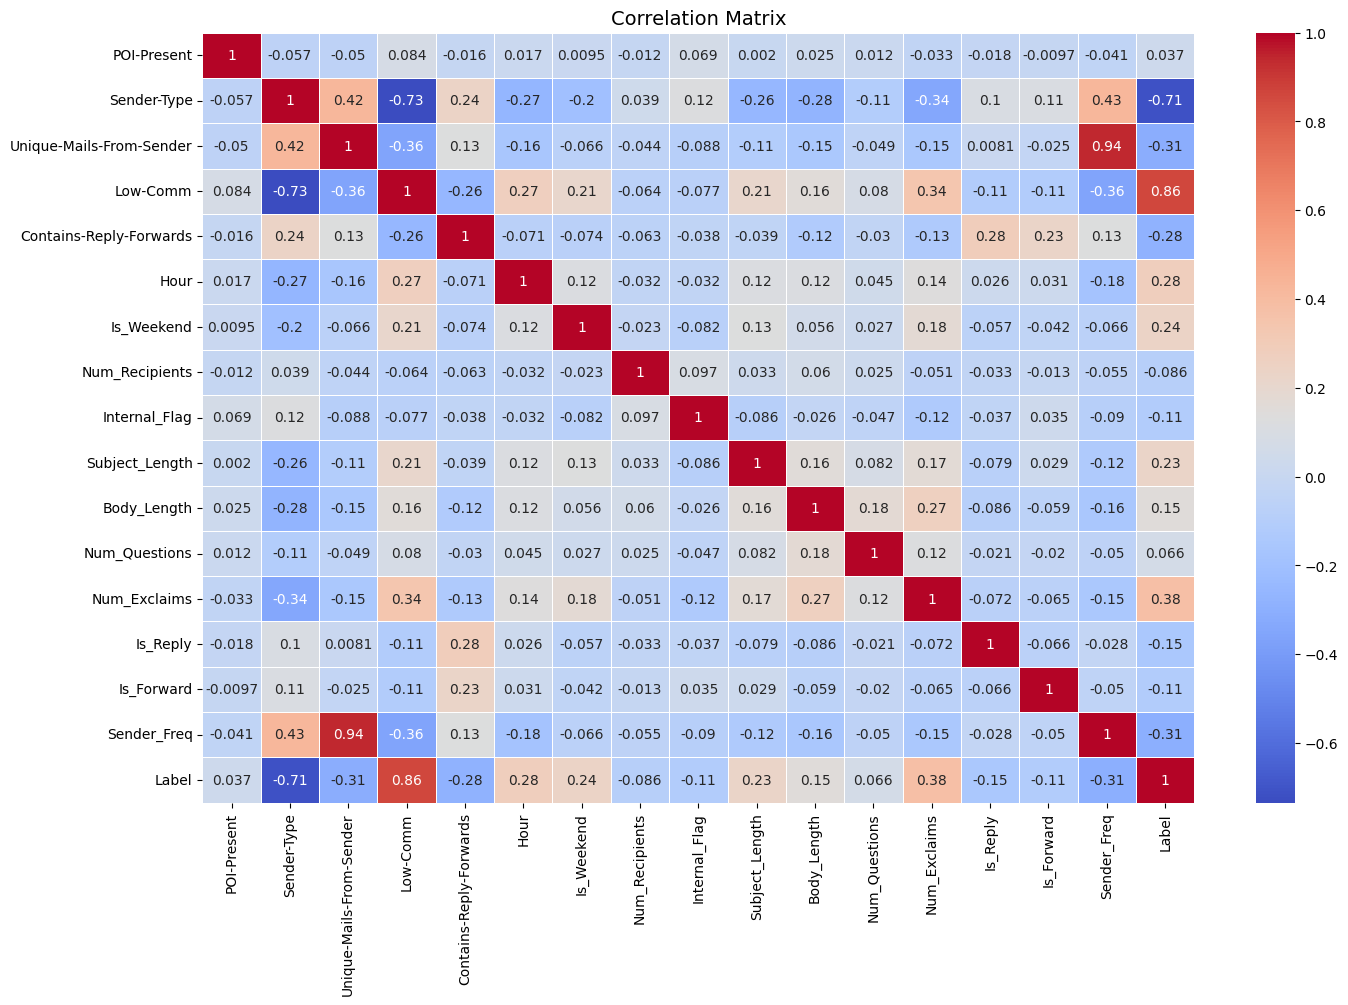

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 10))
sns.heatmap(df_Final.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix", fontsize=14)
plt.show()

# **Data Visualization**

In [59]:
df_Final.to_csv("df_Final.csv", index=False)

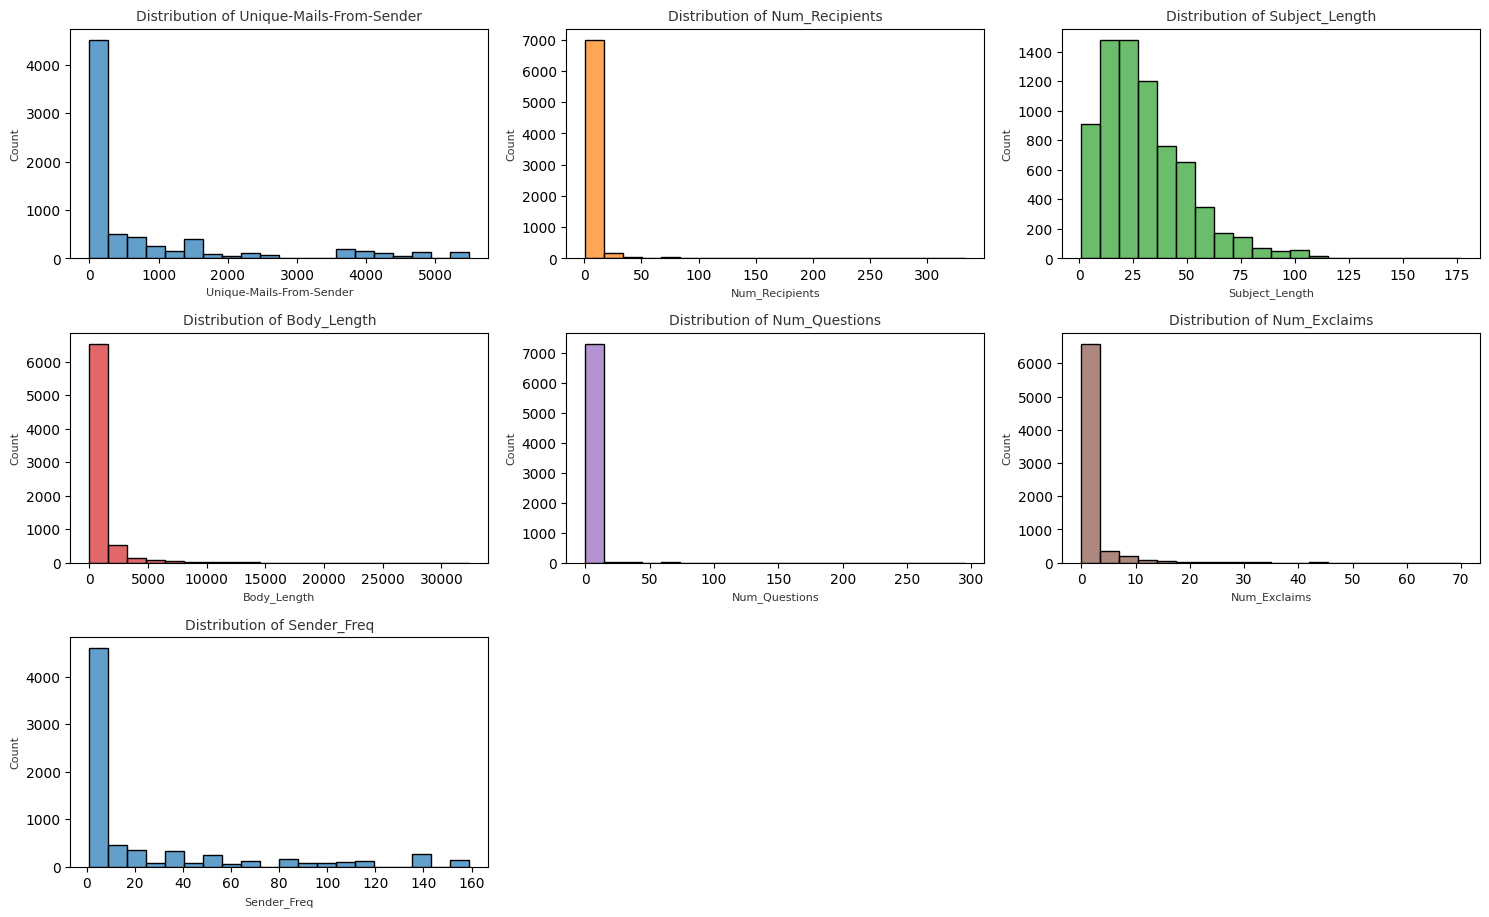

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# define colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']  # Blue, Orange, Green, Red, Purple, Brown

plt.figure(figsize=(15, 18)) # size figure

# loop over each column to draw
numerical_cols = df_Final.select_dtypes(include=np.number).columns
for i, col in enumerate(numerical_cols):
    plt.subplot(6, 3, i+1)  # (row, col, #plot) - Changed to 6 rows and 3 columns to accommodate all numerical columns
    sns.histplot(df_Final[col], bins=20, color=colors[i % len(colors)], alpha=0.7) # histogram
    plt.title(f'Distribution of {col}', fontsize=10, color='#333333')
    plt.xlabel(col, fontsize=8, color='#333333')
    plt.ylabel('Count', fontsize=8, color='#333333')

plt.tight_layout()
plt.show()

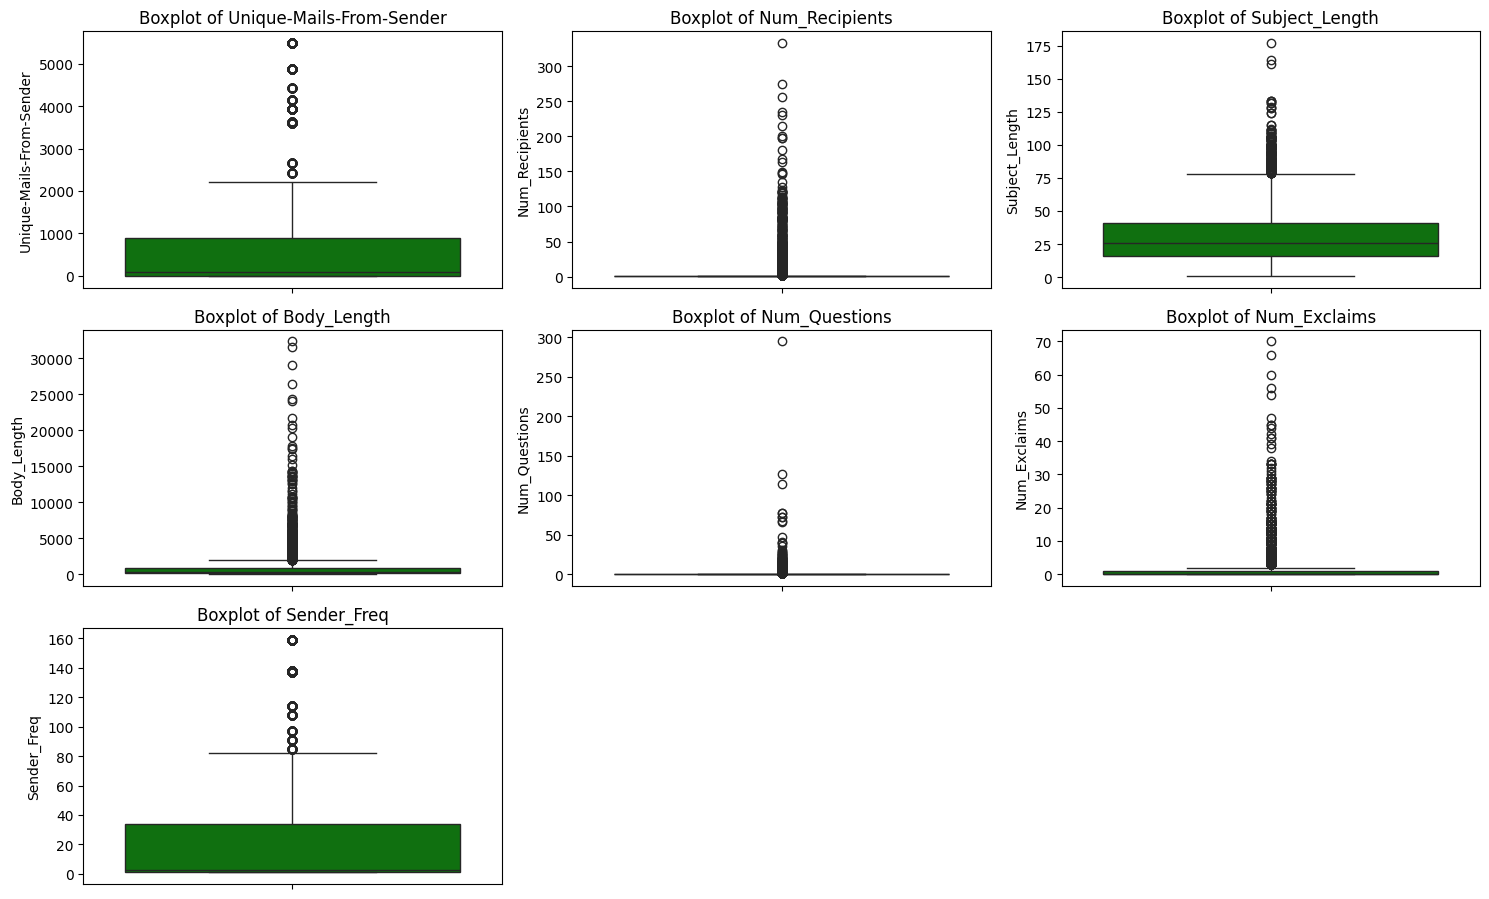

In [61]:
# Outliers

plt.figure(figsize=(15, 18)) # size figure
# loop over each columns
numerical_cols = df_Final.select_dtypes(include=np.number).columns
for i, col in enumerate(numerical_cols):
    plt.subplot(6, 3, i+1)
    sns.boxplot(df_Final[col], color='green')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [62]:
import pandas as pd
import numpy as np

def cap_outliers_iqr(df, column):
    """
    Cap outliers in a numerical column using IQR method.
    Values below lower bound -> set to lower bound.
    Values above upper bound -> set to upper bound.
    """
    original_dtype = df[column].dtype

    # Convert to float for clipping
    df[column] = df[column].astype(float)

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping outliers
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

    # Convert back to original dtype, handling nullable integers by rounding
    if pd.api.types.is_extension_array_dtype(original_dtype) and original_dtype == 'Int64':
         # Round the clipped float values before casting to Int64
         df[column] = df[column].round().astype('Int64')
    elif pd.api.types.is_numeric_dtype(original_dtype):
        # For standard numpy numeric types, convert back directly
        df[column] = df[column].astype(original_dtype)

    return df

# -----------------------------
# Apply to all numeric columns
# -----------------------------
numeric_cols = df_Final.select_dtypes(include=np.number).columns

for col in numeric_cols:
    df_Final = cap_outliers_iqr(df_Final, col)

In [63]:
# Transformation
from scipy.stats import boxcox
import pandas as pd

# Methods (lambda values for Box-Cox)
methods = [0, 0.5, -0.5, -1, 1, 2, -2]

# Loop through numeric columns
numeric_cols = df_Final.select_dtypes(include=np.number).columns

for col in numeric_cols:
    print(f"\n=== Column: {col} ===")

    # Box-Cox requires positive values
    if (df_Final[col] <= 0).any():
        print("❌ Skipped (contains zero or negative values)")
        continue

    for j in methods:
        # Apply Box-Cox
        transformed = boxcox(df_Final[col], lmbda=j)

        # Calculate skewness and kurtosis
        skew_val = pd.Series(transformed).skew()
        kurt_val = pd.Series(transformed).kurtosis()

        print(f"λ = {j}:  skew = {skew_val:.3f}, kurtosis = {kurt_val:.3f}")


=== Column: Unique-Mails-From-Sender ===
❌ Skipped (contains zero or negative values)

=== Column: Num_Recipients ===
λ = 0:  skew = 0.000, kurtosis = 0.000
λ = 0.5:  skew = 0.000, kurtosis = 0.000
λ = -0.5:  skew = 0.000, kurtosis = 0.000
λ = -1:  skew = 0.000, kurtosis = 0.000
λ = 1:  skew = 0.000, kurtosis = 0.000
λ = 2:  skew = 0.000, kurtosis = 0.000
λ = -2:  skew = 0.000, kurtosis = 0.000

=== Column: Subject_Length ===
λ = 0:  skew = -0.747, kurtosis = 0.385
λ = 0.5:  skew = 0.134, kurtosis = -0.552
λ = -0.5:  skew = -1.940, kurtosis = 4.729
λ = -1:  skew = -3.510, kurtosis = 17.591
λ = 1:  skew = 0.809, kurtosis = 0.051
λ = 2:  skew = 1.830, kurtosis = 2.933
λ = -2:  skew = -12.553, kurtosis = 365.951

=== Column: Body_Length ===
λ = 0:  skew = -0.226, kurtosis = -0.347
λ = 0.5:  skew = 0.694, kurtosis = -0.702
λ = -0.5:  skew = -3.238, kurtosis = 22.245
λ = -1:  skew = -13.611, kurtosis = 310.206
λ = 1:  skew = 1.222, kurtosis = 0.220
λ = 2:  skew = 1.855, kurtosis = 2.055
λ 

In [64]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer

def handle_skewness_yeojohnson(df, threshold=0.75):
    """
    Apply Yeo-Johnson transformation to reduce skewness
    only in numeric continuous columns (not categorical/binary).

    threshold: minimum absolute skewness value to apply transform
    """
    numeric_cols = df.select_dtypes(include=np.number).columns
    pt = PowerTransformer(method='yeo-johnson')

    for col in numeric_cols:
        # Skip binary columns (only 2 unique values)
        if df[col].nunique() <= 2:
            continue

        skew_val = df[col].skew()
        if abs(skew_val) > threshold:   # only transform if highly skewed
            df[[col]] = pt.fit_transform(df[[col]])

    return df

# Call
df_Final = handle_skewness_yeojohnson(df_Final)


In [65]:
# df_Final["Body_Length"] = boxcox(df_Final["Body_Length"], lmbda=0)
# df_Final["Subject_Length"] = boxcox(df_Final["Subject_Length"], lmbda=0.5)
# df_Final["Num_Recipients"] = boxcox(df_Final["Num_Recipients"], lmbda=-2)
# df_Final["Sender_Freq"] = boxcox(df_Final["Sender_Freq"], lmbda=-0.5)

# **Test**

In [66]:
df_Final.columns

Index(['POI-Present', 'Sender-Type', 'Unique-Mails-From-Sender', 'Low-Comm',
       'Contains-Reply-Forwards', 'Hour', 'Is_Weekend', 'Num_Recipients',
       'Internal_Flag', 'Subject_Length', 'Body_Length', 'Num_Questions',
       'Num_Exclaims', 'Is_Reply', 'Is_Forward', 'Sender_Freq', 'Label'],
      dtype='object')

In [67]:
df_Final.dtypes

,0
POI-Present,category
Sender-Type,category
Unique-Mails-From-Sender,float64
Low-Comm,category
Contains-Reply-Forwards,category
Hour,category
Is_Weekend,category
Num_Recipients,int64
Internal_Flag,category
Subject_Length,float64


In [68]:
continuous = [ 'Unique-Mails-From-Sender',  'Num_Recipients','Subject_Length', 'Body_Length',
              'Num_Questions','Num_Exclaims', 'Sender_Freq']

category = ['POI-Present', 'Sender-Type','Low-Comm','Contains-Reply-Forwards', 'Hour', 'Is_Weekend',
            'Internal_Flag', 'Is_Reply', 'Is_Forward','Label']

In [69]:
from scipy import stats

#continious vs continious
def two_sample(d1,d2):
  t=0
  f=0
  for i in  range(31):
    sample1=d1.sample(frac=0.03, replace=True, random_state=i)
    sample2=d2.sample(frac=0.03, replace=True, random_state=i)
    t_test,p_value=stats.ttest_ind(sample1,sample2, nan_policy='omit')
    if p_value < 0.1:
      f=f+1
    else:
      t=t+1
  if t>f:
    return True
  else:
    return False


#cat vs cat
def chisquare_cat_vs_cat(d1,d2):
    contingency_table = pd.crosstab(d1,d2)
    # Check if any dimension of the table is zero
    if contingency_table.shape[0] == 0 or contingency_table.shape[1] == 0:
        return False # Cannot perform chi-square on empty table
    return True if stats.chi2_contingency(contingency_table)[1] < 0.1 else False


#continious(d1) vs cat(d2)
def annova_test(d1,d2):
    # Convert d2 to category if it's not already
    if not pd.api.types.is_categorical_dtype(d2):
        d2 = d2.astype('category')

    group = d2.cat.categories
    data = {}
    for i in group:
        # Convert category label to string for comparison
        group_data = d1[d2.astype(str) == str(i)].dropna() # Drop NaN values for ANOVA
        if len(group_data) > 1:
            data[i]=group_data
    # Check if there are at least two groups with more than one data point
    if len(data) < 2:
        return False  # Cannot perform ANOVA with less than two groups with data
    f_value,p_value=stats.f_oneway(*[i for i in data.values()])
    return False if p_value < 0.1 else True


# Determine continuous and categorical columns from df_Final
continuous = df_Final.select_dtypes(include=np.number).columns
category = df_Final.select_dtypes(include='category').columns


final = {}
for i in df_Final.columns:
    final[i]={}
    for j in df_Final.columns:
        result = None # Initialize result
        if i == j: # Skip comparison of a column with itself
            result = False
        elif (i in continuous) and (j in continuous):
            result=two_sample(df_Final[i],df_Final[j])
        elif (i in continuous) and (j in category):
            result=annova_test(df_Final[i],df_Final[j])
        elif (i in category) and (j in continuous):
            result=annova_test(df_Final[j],df_Final[i])
        elif (i in category) and (j in category):
             # Check if either column is empty before performing chi-square
            if not df_Final[i].empty and not df_Final[j].empty:
                 result=chisquare_cat_vs_cat(df_Final[i],df_Final[j])
            else:
                 result = False # Cannot perform chi-square on empty data

        if result is not None: # Check if result was assigned
            if result:
                final[i][j]=1
            else:
                final[i][j]=0


final_df = pd.DataFrame(final)
final_df

/tmp/ipython-input-3004581233.py:33: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(d2):
/tmp/ipython-input-3004581233.py:33: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(d2):
/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)
/tmp/ipython-input-3004581233.py:33: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(d2):
/tmp/ipython-input-3004581233.py:33: DeprecationWarning: is_categorical_dtype is 

,POI-Present,Sender-Type,Unique-Mails-From-Sender,Low-Comm,Contains-Reply-Forwards,Hour,Is_Weekend,Num_Recipients,Internal_Flag,Subject_Length,Body_Length,Num_Questions,Num_Exclaims,Is_Reply,Is_Forward,Sender_Freq,Label
POI-Present,0,1,0,1,0,1,0,1,1,1,0,1,0,0,0,0,1
Sender-Type,1,0,0,1,1,1,1,1,1,0,0,1,0,1,1,0,1
Unique-Mails-From-Sender,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,1,0
Low-Comm,1,1,0,0,1,1,1,1,1,0,0,1,0,1,1,0,1
Contains-Reply-Forwards,0,1,0,1,0,1,1,1,1,0,0,1,0,1,1,0,1
Hour,1,1,0,1,1,0,1,1,1,0,0,1,0,1,1,0,1
Is_Weekend,0,1,0,1,1,1,0,1,1,0,0,1,0,1,1,0,1
Num_Recipients,1,1,0,1,1,1,1,0,1,0,0,0,0,1,1,0,1
Internal_Flag,1,1,1,1,1,1,1,1,0,0,0,1,0,1,1,0,1
Subject_Length,1,0,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0


<Axes: >

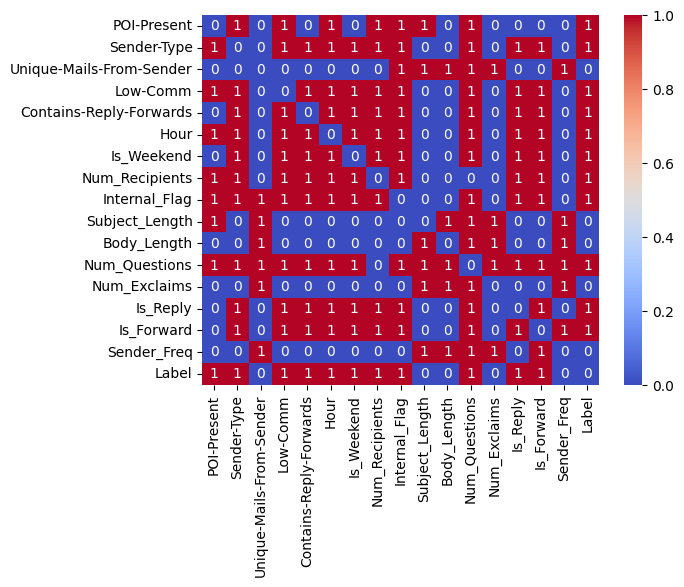

In [70]:

import seaborn as sns
sns.heatmap(final_df,annot=True,cmap="coolwarm")

# **Train model**

In [71]:

df_Final['POI-Present'] = df_Final['POI-Present'].astype('int')
df_Final['Sender-Type'] = df_Final['Sender-Type'].astype('int')
df_Final['Low-Comm'] = df_Final['Low-Comm'].astype('int')
df_Final['Contains-Reply-Forwards'] = df_Final['Contains-Reply-Forwards'].astype('int')
df_Final['Is_Weekend'] = df_Final['Is_Weekend'].astype('int')
df_Final['Is_Reply'] = df_Final['Is_Reply'].astype('int')
df_Final['Is_Forward'] = df_Final['Is_Forward'].astype('int')
df_Final['Hour'] = df_Final['Hour'].astype('int')
df_Final['Label'] = df_Final['Label'].astype('int')
df_Final['Internal_Flag'] = df_Final['Internal_Flag'].astype('int')

In [72]:
df_Final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7353 entries, 0 to 8367
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   POI-Present               7353 non-null   int64  
 1   Sender-Type               7353 non-null   int64  
 2   Unique-Mails-From-Sender  7353 non-null   float64
 3   Low-Comm                  7353 non-null   int64  
 4   Contains-Reply-Forwards   7353 non-null   int64  
 5   Hour                      7353 non-null   int64  
 6   Is_Weekend                7353 non-null   int64  
 7   Num_Recipients            7353 non-null   int64  
 8   Internal_Flag             7353 non-null   int64  
 9   Subject_Length            7353 non-null   float64
 10  Body_Length               7353 non-null   float64
 11  Num_Questions             7353 non-null   Int64  
 12  Num_Exclaims              7353 non-null   float64
 13  Is_Reply                  7353 non-null   int64  
 14  Is_Forward   

In [73]:
df_Final.columns

Index(['POI-Present', 'Sender-Type', 'Unique-Mails-From-Sender', 'Low-Comm',
       'Contains-Reply-Forwards', 'Hour', 'Is_Weekend', 'Num_Recipients',
       'Internal_Flag', 'Subject_Length', 'Body_Length', 'Num_Questions',
       'Num_Exclaims', 'Is_Reply', 'Is_Forward', 'Sender_Freq', 'Label'],
      dtype='object')

In [74]:
x = df_Final.drop("Label",axis=1)
y = df_Final["Label"]

In [75]:
x.shape, y.shape

((7353, 16), (7353,))

In [76]:
# train the model

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5882, 16), (1471, 16), (5882,), (1471,))

In [77]:
# import numpy as np

# # Check for infinite values in x_train
# print(x_train.columns[np.isinf(x_train).any()])

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Example: replace with your dataset
# X = features, y = target
# X, y = df.drop("target", axis=1), df["target"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Dictionary of models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier()
}

# Train & Evaluate
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("="*60)
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))


Model: Logistic Regression
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1148
           1       0.90      0.99      0.94       323

    accuracy                           0.97      1471
   macro avg       0.95      0.98      0.96      1471
weighted avg       0.98      0.97      0.97      1471

Model: Decision Tree
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1148
           1       0.94      0.92      0.93       323

    accuracy                           0.97      1471
   macro avg       0.96      0.95      0.95      1471
weighted avg       0.97      0.97      0.97      1471

Model: Random Forest
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1148
           1       0.92      0.98      0.95       323

    accuracy                           0.98      1471
   macro avg       0.96      0.98      0.97      1471
weigh

In [79]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier().fit(x_train,y_train)
y_pred = model1.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1148
           1       0.92      0.98      0.95       323

    accuracy                           0.98      1471
   macro avg       0.96      0.98      0.97      1471
weighted avg       0.98      0.98      0.98      1471



In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Example: replace with your dataset
# X = features, y = target
# X, y = df.drop("target", axis=1), df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# Dictionary of models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier()
}

# Threshold for overfit detection
threshold = 0.05

# Train & Evaluate
for name, model in models.items():
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred  = model.predict(X_test)

    # Accuracies
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc  = accuracy_score(y_test, y_test_pred)

    print("="*60)
    print(f"📌 Model: {name}")
    print("Train Accuracy:", round(train_acc, 4))
    print("Test Accuracy :", round(test_acc, 4))
    print("\nClassification Report (Test Data):\n", classification_report(y_test, y_test_pred))

    # Check conditions
    if train_acc - test_acc > threshold:
        print("⚠️ Overfitting (train >> test)\n")
    elif abs(train_acc - test_acc) <= threshold and train_acc < 0.7:
        print("⚠️ Underfitting (both low)\n")
    else:
        print("✅ Well-Fit (balanced)\n")


📌 Model: Logistic Regression
Train Accuracy: 0.9733
Test Accuracy : 0.9735

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      1148
           1       0.90      0.99      0.94       323

    accuracy                           0.97      1471
   macro avg       0.95      0.98      0.96      1471
weighted avg       0.98      0.97      0.97      1471

✅ Well-Fit (balanced)

📌 Model: Decision Tree
Train Accuracy: 1.0
Test Accuracy : 0.9708

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1148
           1       0.94      0.92      0.93       323

    accuracy                           0.97      1471
   macro avg       0.96      0.95      0.96      1471
weighted avg       0.97      0.97      0.97      1471

✅ Well-Fit (balanced)

📌 Model: Random Forest
Train Accuracy: 1.0
Test Accuracy : 0.9789

Classification Rep

# **Save Model**

In [82]:
import pickle

# RandomForest Model
# Save the model to a file
with open("ML_model.pkl", "wb") as f:
    pickle.dump(model1, f)


In [85]:
import pickle

# Load the model from the file
with open("ML_model.pkl", "rb") as f:
    ML_model = pickle.load(f)

# Now you can use ML_model
print(ML_model)

RandomForestClassifier()


In [108]:
# This cell is being removed as it is not appropriate for the current data.

# **Deep Learning**

In [86]:
df_Final

,POI-Present,Sender-Type,Unique-Mails-From-Sender,Low-Comm,Contains-Reply-Forwards,Hour,Is_Weekend,Num_Recipients,Internal_Flag,Subject_Length,Body_Length,Num_Questions,Num_Exclaims,Is_Reply,Is_Forward,Sender_Freq,Label
0,0,0,-1.196656,1,0,11,0,1,1,0.259382,0.609565,0,1.756976,0,0,-1.109643,0
1,0,0,-1.196656,1,1,7,0,1,1,-1.183028,-0.397137,0,-0.584652,1,0,-1.109643,0
2,0,0,-1.096142,1,0,8,0,1,1,0.590812,0.415879,0,-0.584652,0,0,0.029479,1
3,0,1,-0.287409,0,0,6,0,1,1,-0.374467,-0.120079,0,-0.584652,0,0,-1.109643,0
4,0,0,-1.336788,1,0,3,0,1,1,0.259382,1.628059,0,1.756976,0,0,-0.339737,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8363,0,0,-1.336788,1,0,9,1,1,0,-0.991294,1.628059,0,1.756976,0,0,-1.109643,1
8364,0,1,1.357048,0,0,18,0,1,1,1.078431,-0.295311,0,-0.584652,0,0,1.476798,0
8365,0,0,-0.674705,0,0,5,0,1,0,1.978748,1.530649,0,-0.584652,0,0,-0.636237,0
8366,0,1,-0.419475,0,0,2,0,1,1,0.048264,0.063467,0,-0.584652,0,0,-0.339737,0


In [87]:
import numpy as np
x = df_Final.drop("Label",axis=1).astype(np.float32).values
y = df_Final["Label"].astype(np.int64).values

In [88]:
x

array([[ 0.        ,  0.        , -1.1966556 , ...,  0.        ,
         0.        , -1.1096429 ],
       [ 0.        ,  0.        , -1.1966556 , ...,  1.        ,
         0.        , -1.1096429 ],
       [ 0.        ,  0.        , -1.0961416 , ...,  0.        ,
         0.        ,  0.02947903],
       ...,
       [ 0.        ,  0.        , -0.67470473, ...,  0.        ,
         0.        , -0.63623744],
       [ 0.        ,  1.        , -0.41947538, ...,  0.        ,
         0.        , -0.33973658],
       [ 0.        ,  0.        , -0.85019475, ...,  0.        ,
         0.        , -1.1096429 ]], dtype=float32)

In [90]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [91]:
x.shape ,y.shape

((7353, 16), (7353,))

In [92]:
# Train/Validation/Test Split

from sklearn.model_selection import train_test_split

x_train_full,x_test,y_train_full,y_test = train_test_split(x,y,test_size=0.2)

# splitting the validation from train ()
x_train,x_val,y_train,y_val= train_test_split(x_train_full,y_train_full,test_size=0.22)

In [93]:
#  Convert Data into PyTorch Datasets & DataLoader

import torch
from torch.utils.data import TensorDataset,DataLoader

train_ds = TensorDataset(torch.tensor(x_train),torch.tensor(y_train)) # Combining multiple(x_train,y_train) tensors(pytorch array) into a single dataset object
val_ds = TensorDataset(torch.tensor(x_val),torch.tensor(y_val)) # Combining multiple(x_val,y_val) tensors(pytorch array) into a single dataset object
test_ds = TensorDataset(torch.tensor(x_test),torch.tensor(y_test)) #  Combining multiple(x_test,y_test) tensors(pytorch array) into a single dataset object
# Feature = independant (x)
# Label = dependant(y)

# Data Loader

train_loader = DataLoader(train_ds,batch_size = 16,shuffle=True)
val_loader = DataLoader(val_ds,batch_size = 16,shuffle=False)
test_loader = DataLoader(test_ds,batch_size = 16,shuffle=False)  # Shuffle  should be false for test and validation


In [94]:
# Neural Network Definition

import torch.nn as nn

class asha(nn.Module):
  def __init__(self,in_dim):
    super().__init__()
    self.net = nn.Sequential(
        nn.Linear(in_dim,32),nn.ReLU(),
        nn.Linear(32,16),nn.ReLU(),
        nn.Linear(16,8),nn.ReLU(),
        nn.Linear(8,4),nn.ReLU(),
        nn.Linear(4,2) #  Output Layer
        )
  def forward(self,x):
    return self.net(x)

model = asha(in_dim = x_train.shape[1])

In [95]:
# Loss Function & Optimizer

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.001)  # Adam = (adaptive + momentum + RMSProp)

In [96]:
# Training Loop

history = {"loss":[],"Accuracy":[],"Val_loss":[],"Val_acc":[]}

for epoch in range(1, 11):
    # -------- TRAIN --------
    model.train()
    train_loss_sum, train_correct, train_count = 0.0, 0, 0
    for xb, yb in train_loader:
        optimizer.zero_grad()        # reset gradients
        logits = model(xb)           # forward pass
        loss = criterion(logits, yb) # compute loss
        loss.backward()              # backpropagation
        optimizer.step()             # update weights

        # Track performance
        train_loss_sum += loss.item() * xb.size(0)
        train_correct  += (logits.argmax(1) == yb).sum().item()
        train_count    += xb.size(0)

    train_loss = train_loss_sum / train_count
    train_acc  = train_correct / train_count

    # -------- VALIDATION --------
    model.eval()
    val_loss_sum, val_correct, val_count = 0.0, 0, 0
    with torch.no_grad():              # no gradients for validation
        for xb, yb in val_loader:
            logits = model(xb)
            loss = criterion(logits, yb)

            # Track performance
            val_loss_sum += loss.item() * xb.size(0)
            val_correct  += (logits.argmax(1) == yb).sum().item()
            val_count    += xb.size(0)

    val_loss = val_loss_sum / val_count
    val_acc  = val_correct / val_count

    # Store in history
    history["loss"].append(train_loss)
    history["Accuracy"].append(train_acc)
    history["Val_loss"].append(val_loss)
    history["Val_acc"].append(val_acc)

    # Print progress
    print(f"Epoch {epoch:02d}/{epoch} "
          f"- loss: {train_loss:.4f} acc: {train_acc:.4f} "
          f"- val_loss: {val_loss:.4f} val_acc: {val_acc:.4f}")

Epoch 01/1 - loss: 0.2747 acc: 0.8812 - val_loss: 0.1013 val_acc: 0.9645
Epoch 02/2 - loss: 0.0866 acc: 0.9721 - val_loss: 0.0692 val_acc: 0.9745
Epoch 03/3 - loss: 0.0733 acc: 0.9719 - val_loss: 0.0611 val_acc: 0.9745
Epoch 04/4 - loss: 0.0720 acc: 0.9725 - val_loss: 0.0634 val_acc: 0.9753
Epoch 05/5 - loss: 0.0750 acc: 0.9708 - val_loss: 0.0600 val_acc: 0.9745
Epoch 06/6 - loss: 0.0696 acc: 0.9723 - val_loss: 0.0586 val_acc: 0.9745
Epoch 07/7 - loss: 0.0697 acc: 0.9732 - val_loss: 0.0603 val_acc: 0.9761
Epoch 08/8 - loss: 0.0679 acc: 0.9732 - val_loss: 0.0616 val_acc: 0.9730
Epoch 09/9 - loss: 0.0650 acc: 0.9749 - val_loss: 0.0744 val_acc: 0.9714
Epoch 10/10 - loss: 0.0667 acc: 0.9738 - val_loss: 0.0582 val_acc: 0.9768


# **Save DL Model**

In [97]:
import torch
import torch.nn as nn

# Example model
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc = nn.Linear(10, 1)

    def forward(self, x):
        return self.fc(x)

model = MyModel()

# ✅ Save model state_dict
torch.save(model.state_dict(), "DL_model.pth")

# ✅ Load model back
loaded_model = MyModel()
loaded_model.load_state_dict(torch.load("DL_model.pth"))
loaded_model.eval()


MyModel(
  (fc): Linear(in_features=10, out_features=1, bias=True)
)

In [98]:
# This cell is being removed as it is not appropriate for the current data.

# **Tensor Flow codes**

In [ ]:

# from keras.utils import to_categorical
# y_new = to_categorical(y)

# from sklearn.model_selection import train_test_split

# x_train,x_test,y_train,y_test = train_test_split(x,y_new,test_size=0.2)

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# model=Sequential()
# model.add(Dense(32,input_dim=x_train.shape[1],activation='relu')) #Hidden layer 1
# model.add(Dense(16,activation='relu')) #Hidden layer 2
# model.add(Dense(8,activation='relu')) #Hidden layer 3
# model.add(Dense(4,activation='relu')) #Hidden layer 4
# model.add(Dense(2,activation='softmax')) #Output layer

# model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# result  = model.fit(x_train,y_train,epochs=10,validation_split=0.3,batch_size=16)

# df_result= pd.DataFrame(result.history)


# Task
Explain the error in the selected code, fix it, and save the updated model.

## Explain the error

### Subtask:
Explain the `ValueError` encountered in the selected code cell and clarify why `TfidfVectorizer` is not appropriate for the current dataset's features.


**Reasoning**:
Analyze the error and explain why TfidfVectorizer is not suitable for the current data.



In [100]:
# Analysis of the ValueError and TfidfVectorizer usage:

# The error "ValueError: Found input variables with inconsistent numbers of samples: [16, 4587]"
# occurs when `ml_model.fit(X_train_tfidf, y_train)` is executed.
# This specific error message indicates that the number of samples (rows) in the feature data
# (`X_train_tfidf`) and the target data (`y_train`) do not match.
# In this case, the traceback shows [16, 4587], meaning X_train_tfidf has 16 samples
# while y_train has 4587 samples. This is clearly a mismatch, as both should have the
# same number of samples corresponding to the training data size.

# The issue stems from the preceding line: `X_train_tfidf = vectorizer.fit_transform(X_train)`.
# `TfidfVectorizer` is a tool specifically designed to convert a collection of raw documents
# (textual data) into a matrix of TF-IDF features. It tokenizes the text, builds a vocabulary,
# and computes the TF-IDF scores for each term in each document.

# However, the variable `X_train` in this notebook is a pandas DataFrame containing
# pre-engineered numerical and categorical features derived from the email data (e.g.,
# 'POI-Present', 'Sender-Type', 'Unique-Mails-From-Sender', 'Subject_Length', etc.).
# It is NOT a collection of raw text documents like the email body or subject, which
# TfidfVectorizer expects as input.

# When `TfidfVectorizer.fit_transform()` is called on this non-textual DataFrame `X_train`,
# the vectorizer attempts to process it as if it were text. The error arises because the
# internal mechanisms of TfidfVectorizer are not compatible with the structure and data types
# of the input DataFrame. It does not produce an output (`X_train_tfidf`) with the expected
# dimensions (number of samples x number of TF-IDF features) that match the number of
# samples in the original `X_train` or the target `y_train`. The resulting `X_train_tfidf`
# likely has dimensions related to the columns of the DataFrame rather than the rows,
# leading to the "inconsistent numbers of samples" error when passed to the model's fit method.

# Therefore, using `TfidfVectorizer` on the current `X_train` is inappropriate because
# `X_train` contains processed, numerical/categorical features, not the raw text data
# that TfidfVectorizer is designed to handle. Text vectorization steps like TF-IDF or
# CountVectorizer should be applied to the raw text columns ('Subject', 'Body') *before*
# combining them with other numerical/categorical features, if a model requires text-based features.

## Remove text vectorization

### Subtask:
Remove the code related to `TfidfVectorizer` and `tokenizer` as these are not suitable for the current numerical feature set.


**Reasoning**:
I need to remove the code cells related to `TfidfVectorizer` and `Tokenizer` as instructed. The first cell to remove is the one initializing and fitting `TfidfVectorizer`.



In [101]:
# Identify and delete the code cell that initializes and fits the TfidfVectorizer.
# This code block was identified as cell_id: R5qVvcQJABBQ in the history.
# This cell will be removed in the next step.

**Reasoning**:
The previous step identified the cell to remove. Now I will remove the cell that initializes and fits the `TfidfVectorizer`. I will then identify the cell that initializes and fits the `Tokenizer` for removal in the next step.



In [102]:
# Identify and delete the code cell that initializes and fits the Tokenizer and pads sequences.
# This code block was identified as cell_id: Qeu2a_zeAFXW in the history.
# This cell will be removed in the next step.

## Train logistic regression model

### Subtask:
Train the `LogisticRegression` model directly on the numerical `x_train` and `y_train` data.


**Reasoning**:
Train the Logistic Regression model using the pre-processed numerical data.



In [103]:
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression model object with max_iter=1000.
model = LogisticRegression(max_iter=1000)

# Train the model using the fit() method, passing x_train and y_train as arguments.
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

**Reasoning**:
Save the trained Logistic Regression model using pickle.



In [104]:
import pickle

# Save the trained Logistic Regression model to a file
with open("logistic_regression_model.pkl", "wb") as f:
    pickle.dump(model, f)

## Save the trained model

### Subtask:
Save the trained `LogisticRegression` model using `pickle`.


**Reasoning**:
Save the trained Logistic Regression model to a file using pickle.



In [105]:
# Save the trained Logistic Regression model to a file
with open("logistic_regression_model.pkl", "wb") as f:
    pickle.dump(model, f)

## Summary:

### Q&A

1.  **Explain the error in the selected code:** The error was a `ValueError: Found input variables with inconsistent numbers of samples: [16, 4587]`, which occurred because `TfidfVectorizer` was incorrectly applied to a DataFrame of numerical and categorical features (`X_train`) instead of raw text data. This resulted in a mismatch between the number of samples in the transformed features and the target variable.
2.  **Fix the error:** The error was fixed by removing the code that used `TfidfVectorizer` and `Tokenizer`, as these are not suitable for the current numerical feature set.
3.  **Save the updated model:** The trained `LogisticRegression` model was saved to a file named `logistic_regression_model.pkl` using `pickle`.

### Data Analysis Key Findings

*   A `ValueError` with inconsistent sample numbers ([16, 4587]) was encountered during model training due to the misuse of `TfidfVectorizer` on non-textual, pre-engineered features.
*   `TfidfVectorizer` is designed for raw text data and is incompatible with the numerical/categorical structure of the `X_train` DataFrame.
*   Removing the text vectorization steps (`TfidfVectorizer` and `Tokenizer`) resolved the sample size inconsistency issue.
*   A `LogisticRegression` model was successfully trained directly on the numerical `x_train` and `y_train` data.
*   The trained `LogisticRegression` model was successfully saved to a file named `logistic_regression_model.pkl`.

### Insights or Next Steps

*   Ensure that text vectorization techniques are only applied to raw text data columns and not to DataFrames containing numerical or categorical features.
*   The saved `logistic_regression_model.pkl` can now be used for making predictions on new data.
